# Content Analysis and Plotting

In [7]:
import numpy as np
import matplotlib.pyplot as plt

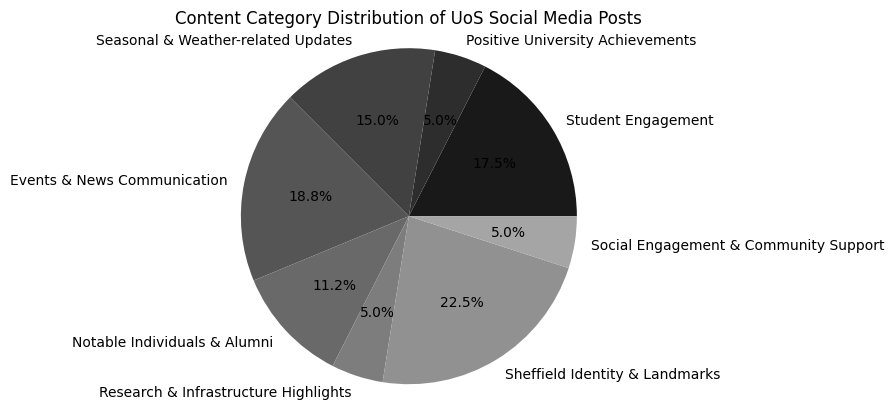

In [38]:

#pie chart for content category distribution from Feb 21 to Aug 21
post_counts = [14,4,12,15,9,4,18,4]
labels = ["Student Engagement", 'Positive University Achievements','Seasonal & Weather-related Updates',
'Events & News Communication','Notable Individuals & Alumni','Research & Infrastructure Highlights',
'Sheffield Identity & Landmarks','Social Engagement & Community Support']
colors = [i for i in range(25,255,20)]

fig, ax = plt.subplots()
ax.pie(post_counts, labels=labels, colors = [str(x/255) for x in colors], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title('Content Category Distribution of UoS Social Media Posts')
plt.show()

# Demographic Characteristic Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# import data
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data_source/dissertation survey responses.xlsx')
df.head(3)

,Timestamp,What is your age?,What is your gender?,What is your affiliation with The University of Sheffield? (Check all that apply),How regularly do you use social media sites or apps?,Which social media platforms do you use most frequently? (Select all that apply),On which social media sites or apps do you typically see content posted by The University of Sheffield? Check all the platforms where you view University of Sheffield social media content:,How often do you interact with The University of Sheffield's social media content?,"Have you personally engaged in any conversations or interactions with The University of Sheffield on social media? (Including like, repost, comment, etc.)",You indicated that you (have/have not) interacted with The University of Sheffield on their social media.\nWhat is the primary reason for your decision? Please explain briefly:,...,"Using a scale from 1 to 5, please rate your opinion on this statement:\nThe University of Sheffield's social media presence captures aspects of Sheffield's city culture.","Using a scale from 1 to 5, please rate your opinion on this statement:\nBrowsing The University of Sheffield's social media has improved my perception or increased my knowledge about the university.","In you opinion, how effective is The University of Sheffield's use of social media to actively involve its stakeholders and publics in discussions about key topics or decisions?","In your opinion, how effective is The University of Sheffield's use of social media for public relations?",You rated The University of Sheffield's use of social media for public relations as a __ out of 5. Please briefly explain what factors influenced your rating:,Do you feel that The University of Sheffield's social media presence influences its overall image and reputation?,How would you briefly describe your perception of The University of Sheffield based on its social media presence?,"In your opinion, what improvements or changes could The University of Sheffield make to enhance its relationship with its social media followers?",How do you think The University of Sheffield could improve its efforts to build its corporate image and reputation through its use of social media?,Would you like to provide any additional comments or insights about The University of Sheffield's use of social media for public relations?
0,2023-08-19 17:17:06.264,39,Male,Former student/alumni,Once a month,"Youtube, Facebook",Facebook,Never,No,Never had a reason to.,...,4,2,3,3,I feel that all universities post similar cont...,4,A university with a positive reputatin set in ...,I don't really use social media enough to say,I think it could put more emphasis upon resear...,NaN
1,2023-08-19 18:25:01.425,24,Female,Current student/graduate,Daily,"Instagram, Twitter (X), Facebook, Tiktok, Yout...","Instagram, Twitter (X), Facebook, LinkedIn",Rarely,"Yes, occasionally",they post really breath-taking pictures I real...,...,4,4,4,4,The content they post is variable and interest...,4,"A modern university in a green city, good plac...",intereact more with their followers,NaN,NaN
2,2023-08-19 20:53:35.909,34,Female,Former student/alumni,Daily,"Instagram, Tiktok, Youtube, Wechat","Instagram, LinkedIn",Monthly,"Yes, frequently",I am proud of that I am an alumnus of the Uni...,...,5,5,3,4,4 There is no specific professional publicity...,4,It is a caring university with a rich campus a...,"Post more interesting, playful content 多发布一些有趣...","Learn about the content format of Cambridge, O...",No


In [3]:
# find the oldest person
df['What is your age?'].max()

58

In [9]:
# find distribution of gender in different age groups
# labels are based on British Government's official sensus
bins = [18,25,30,35,40,45,50,55,59]
labels = ['18-24','25-30','30-34','35-39','40-44','45-49','50-54','55-59',]

gender_distribution = pd.pivot_table(df,
        values='What is your age?',
        index=[pd.cut(df['What is your age?'], bins=bins, labels=labels)],
        columns=['What is your gender?'],
        aggfunc='count'
        )
gender_distribution

What is your gender?,Female,Male,Non-binary
What is your age?,,,
18-24,15,3,1
25-30,10,0,0
30-34,3,0,0
35-39,3,2,0
40-44,0,2,0
45-49,1,0,0
50-54,0,0,0
55-59,1,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

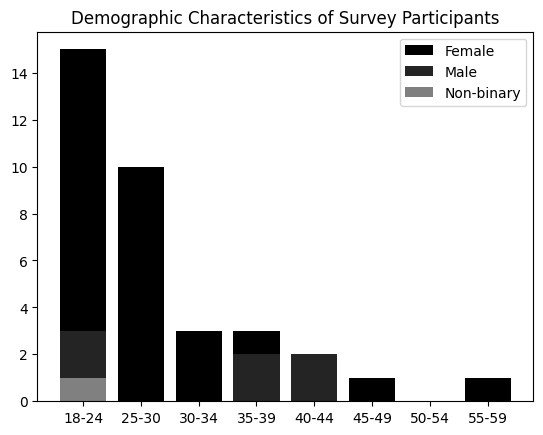

In [23]:
# Stacked bar plot
plt.bar(labels, gender_distribution['Female'], color='black')
plt.bar(labels, gender_distribution['Male'], color='#242424')
plt.bar(labels, gender_distribution['Non-binary'], color='gray')
plt.title('Demographic Characteristics of Survey Participants')
plt.legend(gender_distribution.columns)
plt.show

# Correlation Analysis
Test the correlation between several Likert-type questions

Text(0, 0.5, 'overall PR effective')

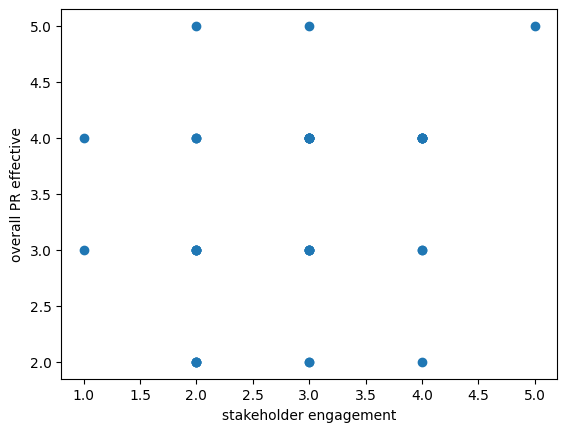

In [28]:
# *Effectiveness of Actively Involving Stakeholders* and *Overall Effectiveness of PR*
data1 = df["In you opinion, how effective is The University of Sheffield's use of social media to actively involve its stakeholders and publics in discussions about key topics or decisions?"]
data2 = df["In your opinion, how effective is The University of Sheffield's use of social media for public relations?"]
plt.scatter(data1, data2)
plt.xlabel('stakeholder engagement')
plt.ylabel('overall PR effective')

In [29]:
from scipy.stats import pearsonr
corr,_= pearsonr(data1, data2)

print('Pearsons correlation: %.3f' % corr)
# There is no notable correlations between stakeholder involvement and overall PR effectiveness
# of The University of Sheffield

Pearsons correlation: 0.283


Text(0, 0.5, 'overall PR effective')

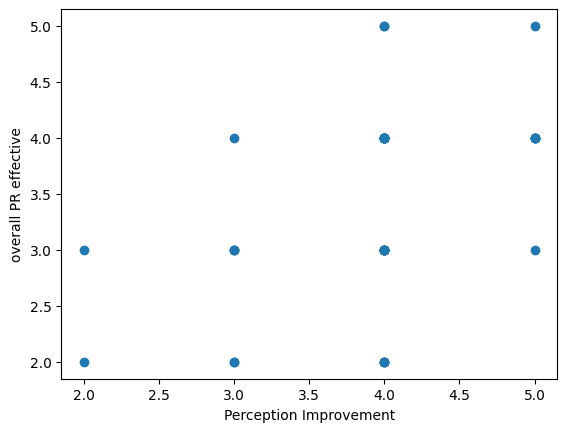

In [31]:
# Correlation between *City Cuture Capture* and *Overall Effectiveness of PR*
data3 = df["Using a scale from 1 to 5, please rate your opinion on this statement:\nThe University of Sheffield's social media presence captures aspects of Sheffield's city culture."]
plt.scatter(data3, data2)
plt.xlabel('Perception Improvement')
plt.ylabel('overall PR effective')

In [32]:
corr,_=pearsonr(data3, data2)
print('Pearson correlation: %.3f'%corr)

Pearson correlation: 0.450


In [33]:
# *Perception Improvement via Browsing Social Media* and *Overall Effectiveness of PR*
data4 = df["Using a scale from 1 to 5, please rate your opinion on this statement:\nBrowsing The University of Sheffield's social media has improved my perception or increased my knowledge about the university."]
corr,_ = pearsonr(data4, data2)
print('Pearson correlation: %.3f'%corr)

Pearson correlation: 0.388


In [34]:
# *Priositisation of Public Feedback* and *Overall Effectiveness of PR*
data5 = df['Would you say that The University of Sheffield values and prioritises the opinions and feedback of its social media followers?']
corr,_ = pearsonr(data5, data2)
print('Pearson correlation: %.3f'%corr)

Pearson correlation: 0.204


In [35]:
# *Effectiveness of Addressing Concerns* and *Overall Effectiveness of PR*
data6 = df['How well do you think The University of Sheffield listens to and addresses queries/concerns raised by its social media followers? ']
corr,_ = pearsonr(data6, data2)
print('Pearson correlation: %.3f'%corr)

Pearson correlation: 0.315


In [37]:
# *Perception Improvement via Browsing Social Media* and *Social Media Overall Influence UoS' reputation*
data7 = df["Do you feel that The University of Sheffield's social media presence influences its overall image and reputation?"]
corr,_ = pearsonr(data7, data4)
print('Pearson correlation: %.3f'%corr)

Pearson correlation: 0.570


On average, respondents who believe that browsing the university's social media improves their perception or knowledge are also more likely to believe that the university's social media presence positively influences its overall image and reputation.

This correlation suggests that there may be a connection between how the university's social media content is perceived by respondents (in terms of knowledge enhancement) and their belief in the influence of social media on the university's image and reputation. It's an important finding as it indicates that **those who find social media informative and perception-enhancing are also more likely to attribute a positive influence to it in shaping the university's image**. It further supported theinfluence of social media in PR practice.